# Guided Project: Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

## 1.Overview

In [150]:
import numpy as np

In [151]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [152]:
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: 

In [153]:
# Lets see the columns 
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [154]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [155]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head(4)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              

            ...                  Unnamed: 28  \
1           ...               Very favorably   
2           ...                          NaN   
3           ...             Unfamiliar (N/A)   
4           ...               Very favorably   

        Which character shot first?  \
1  I don't understand this question   
2                               NaN   
3  I don't understand this question   
4  I don't understand this question   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   

  Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                   
2                

## 2. Cleaning and Mapping yes/no columns 
Take a look at the next two columns, which are:

Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [156]:
yes_no = { 'Yes' : True, 'False': False } 
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [157]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [158]:
star_wars.head(5)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                                NaN             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                                NaN                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   
5  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   
5  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   
5  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

            ...                    Unnamed: 28  \
1           ...                 Very favorably   
2           ...                            NaN   
3           ...               Unfamiliar (N/A)   
4           ...     

## 3. Cleaning and Mapping checkbox columns: 
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

In [159]:
# Convert each column above so that it only contains the values True and False.
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [160]:
# Renaming the columns 
name_map = { 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    "Unnamed: 4": 'seen_2',
    "Unnamed: 5": 'seen_3',
    "Unnamed: 6": 'seen_4',
    "Unnamed: 7": 'seen_5',
    "Unnamed: 8": 'seen_6',
    
}

In [161]:
star_wars = star_wars.rename(columns= name_map)

In [162]:
star_wars.head(3)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                                NaN             
3  3.292765e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                                NaN                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True    True    True    True    True    True   
2   False   False   False   False   False   False   
3    True    True    True   False   False   False   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              

            ...                  Unnamed: 28  \
1           ...               Very favorably   
2           ...                          NaN   
3           ...             Unfamiliar (N/A)   

        Which character shot first?  \
1  I don't understand this question   
2                               NaN   
3  I don't understand this question   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   

  Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                   
2                                                NaN                   
3                                                NaN                   

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   

     Age Household Income           Education Location (Census Region)  
1  18-29              NaN  High school degree           South Atlantic  
2  18-29     $0 - $24,999     Bachelor degree       West South Central  
3  18-29     $0 - $24,999  High school degree       West North Central  

[3 rows x 38 columns]

In [163]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

### 4. Cleaning the Ranking columns 

In [164]:
# Give each column a more descriptive name. We suggest ranking_1, ranking_2, and so on.
ranking = { 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
           
        'Unnamed: 10' : 'ranking_2' , 'Unnamed: 11' : 'ranking_3', 'Unnamed: 12' : 'ranking_4', 
           'Unnamed: 13' : 'ranking_5', 'Unnamed: 14' : 'ranking_6'
            }

In [165]:
star_wars = star_wars.rename(columns=ranking)

In [166]:
# Convert each of the columns above to a float type.
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [167]:
star_wars.head(2)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                                NaN             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  \
1    True    True    True    True    True    True        3.0   
2   False   False   False   False   False   False        NaN   

            ...                Unnamed: 28       Which character shot first?  \
1           ...             Very favorably  I don't understand this question   
2           ...                        NaN                               NaN   

   Are you familiar with the Expanded Universe?  \
1                                           Yes   
2                                           NaN   

   Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                    
2                                                NaN                    

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                  Male   
2                                                Yes                  Male   

     Age Household Income           Education Location (Census Region)  
1  18-29              NaN  High school degree           South Atlantic  
2  18-29     $0 - $24,999     Bachelor degree       West South Central  

[2 rows x 38 columns]

### 5. Finding the highest - Ranked movie: 
Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

In [168]:
rank_mean = star_wars[star_wars.columns[9:15]].mean()

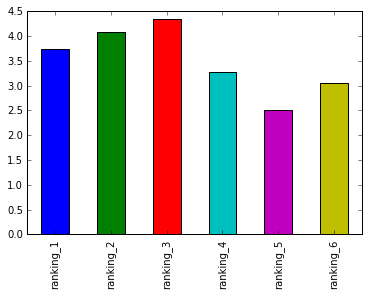

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
rank_mean.plot.bar()
plt.show()

We can observe that Part III of the move has recieved more liked by the audience followed by part II, followed by the rest. Part V recieved least ratings among the 6 parts. 

### 6. Finding the most viewed movie 

In [171]:
sum_view = star_wars[star_wars.columns[3:9]].sum() 

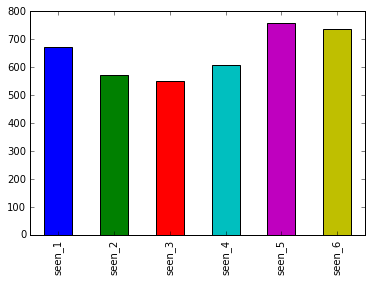

In [173]:
sum_view.plot.bar()

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

### 7. Exploring the data by Binary Segments 
We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female


In [175]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

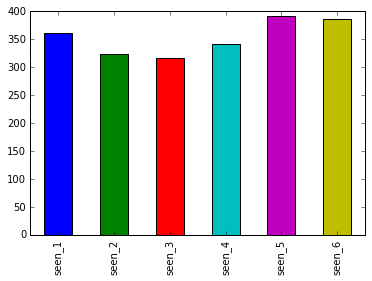

In [177]:
males[males.columns[3:9]].sum().plot.bar() 

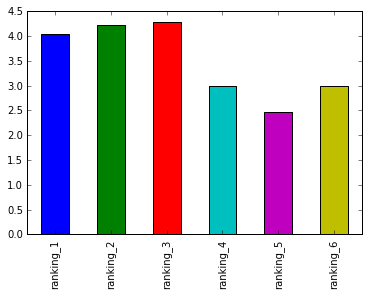

In [180]:
males[males.columns[9:15]].mean().plot.bar() 

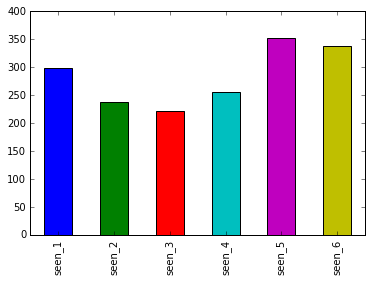

In [178]:
females[females.columns[3:9]].sum().plot.bar() 

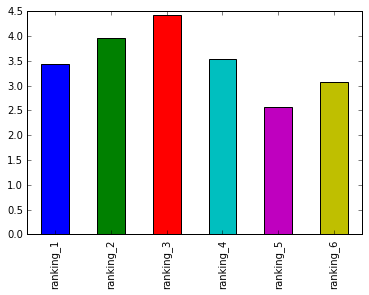

In [181]:
females[females.columns[9:15]].mean().plot.bar() 